# Multiarm Bandit

In [1]:
from typing import Iterable, Tuple, List
import random

import numpy as np
import matplotlib.pyplot as plt

from tqdm import trange

In [2]:
class Bandit:
    """A bandit with uniform reward distribution."""

    def __init__(self, mean: float, span: float):
        """Initialize the bandit.

        Regardless of the received action, the bandit will return reward
        uniformly sampled from segment [`mean`-`span`, `mean`+`span`].

        Args:
            mean (float): Mean (expected) value of the reward.
            span (float): Span of the reward.
        """
        self.mean = mean
        self.span = span

    def pull_leaver(self) -> float:
        """Pull leaver and obtain reward.

        Returns:
            float: The obtained reward.
        """
        return self.mean + 2 * self.span * (
            random.random() - 0.5
        )  # random number in [mean-span, mean+span]

class BanditsEnvironment:
    """An environment consisting of multiple bandits."""

    def __init__(self, bandits: Iterable[Bandit], penalty=1000):
        """Initialize the environment.

        Args:
            bandits (iter[Bandit]): Bandits to be used within the environment.
            penalty (int, optional):
                If the external agents attempts to use a bandit not in the list,
                i.e. if the chosen action is negative or bigger than the index of
                the last bandit, the returned reward will be `-penalty`. Defaults to 1000.
        """
        self.bandits: list[Bandit] = list(bandits)
        self.penalty = penalty

    def take_action(self, a: int):
        """
        Select bandit `a` and pull its leaver.

        If the selected agent is valid, return the obtained reward.
        Otherwise, return negative penalty.
        """
        if a < 0 or a >= len(self.bandits):
            return -self.penalty
        else:
            return self.bandits[a].pull_leaver()


def choose_greedy_action(q: List[int]) -> int:
    """
    Selects the action with the highest estimated reward.

    Args:
        q (List[int]): A list of estimated rewards for each action.

    Returns:
        int: The index of the action with the highest estimated reward.
    """
    return max(range(len(q)), key=lambda i: q[i])


def choose_random_action(n: int) -> int:
    """
    Selects a random action from a given number of actions.

    Args:
        n (int): The total number of actions available.

    Returns:
        int: The index of the randomly selected action.
    """
    return random.randint(0, n - 1)


def choose_eps_greedy_action(q: List[int], eps: float) -> int:
    """
    Chooses an action based on the epsilon-greedy strategy. With probability `eps`,
    it selects a random action, and with probability `1 - eps`, it selects the
    action with the highest estimated reward.

    Args:
        q (List[int]): A list of estimated rewards for each action.
        eps (float): The probability of choosing a random action.

    Returns:
        int: The index of the chosen action.
    """
    if random.random() > eps:
        return choose_greedy_action(q)
    else:
        return choose_random_action(len(q))

## Trening loop
Trains a multi-armed bandit environment using an epsilon-greedy strategy. This approach combines the methods of exploitation and exploration. Exploitation uses the best-known option to gain maximum reward in the short term, while exploration tries random actions to discover potentially better options for future rewards.

The value of each bandit is updated using a simple incremental formula, which is a form of a first-order filter. This update rule adjusts the estimated reward for each bandit based on the observed reward and the previous estimate, allowing the estimates to converge to the true rewards over time.

Args:

`bandits_no` (int): Number of bandits in the environment. 

`attempts_no` (int): Total number of attempts (lever pulls).

`alpha` (float): Learning rate, controlling the blend between new and old information.

`epsilon` (float): Probability of selecting a random action (exploration factor).
    
`plotting (bool)`: If True, plots the estimated values and actual mean values of bandits.

Returns:
    `Tuple[BanditsEnvironment, List[float], List[float]]`: A tuple containing the environment,
    list of rewards for each attempt, and the final estimated values (q values).

100%|██████████| 5000/5000 [00:00<00:00, 716264.90it/s]


(<__main__.BanditsEnvironment at 0x1e64862e810>,
 [3.4158677016467047,
  2.6206139939646493,
  4.583042991040283,
  2.45220577018284,
  -3.0798405805202766,
  0.49974170354278225,
  3.1713487789774577,
  2.777484920097408,
  0.9438219963609276,
  1.2044783534937582,
  3.5436748081791096,
  1.5149653560387661,
  1.889542519773633,
  2.889393805532326,
  0.0141629687700493,
  3.1736665932935457,
  1.431986091117066,
  0.1634938773074639,
  0.2405594264716464,
  4.065751938248094,
  3.607067776267014,
  1.2662930387852263,
  2.990411427419925,
  2.470719032970581,
  4.69396955534144,
  3.668151393141804,
  1.96591430883834,
  2.05582426131995,
  1.4035928425563515,
  -0.9685440671156464,
  3.4636225318276717,
  1.8867948742523968,
  4.353457480013358,
  1.2300265462925108,
  1.9929645640939175,
  0.6277907991799971,
  3.6964043791185337,
  -0.6361633226185421,
  2.7524478539994,
  4.516599399690769,
  3.631441608880343,
  1.8237346076595995,
  3.57012779110307,
  -1.9552083279563628,
  0.

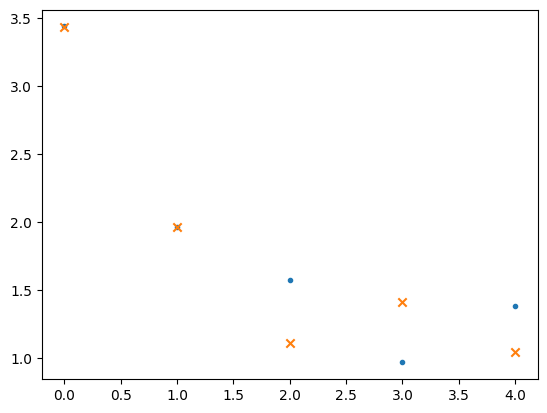

In [3]:
def train(
    bandits_no: int = 5,
    attempts_no: int = 5000,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    plotting: bool = True,
) -> Tuple[BanditsEnvironment, List[float], List[float]]:

    bandits = [
        Bandit(10 * (random.random() - 0.5), 5 * random.random())
        for _ in range(bandits_no)
    ]
    env = BanditsEnvironment(bandits)

    q = [100 for _ in range(bandits_no)]
    rewards = []

    for t in trange(attempts_no):
        a = choose_eps_greedy_action(q, epsilon)
        r = env.take_action(a)
        q[a] = q[a] + alpha * (r - q[a])

        rewards.append(r)

    if plotting:
        plt.scatter(range(len(q)), q, marker=".")
        plt.scatter(range(len(q)), [b.mean for b in env.bandits], marker="x")

    return env, rewards, q

train()

### Zadatak 1:

Pokrenuti trening za razlicite vrednosti epsilon, prikazati rezultate i izvesti zakljucak o nagibu krive.

100%|██████████| 5000/5000 [00:00<00:00, 712686.74it/s]


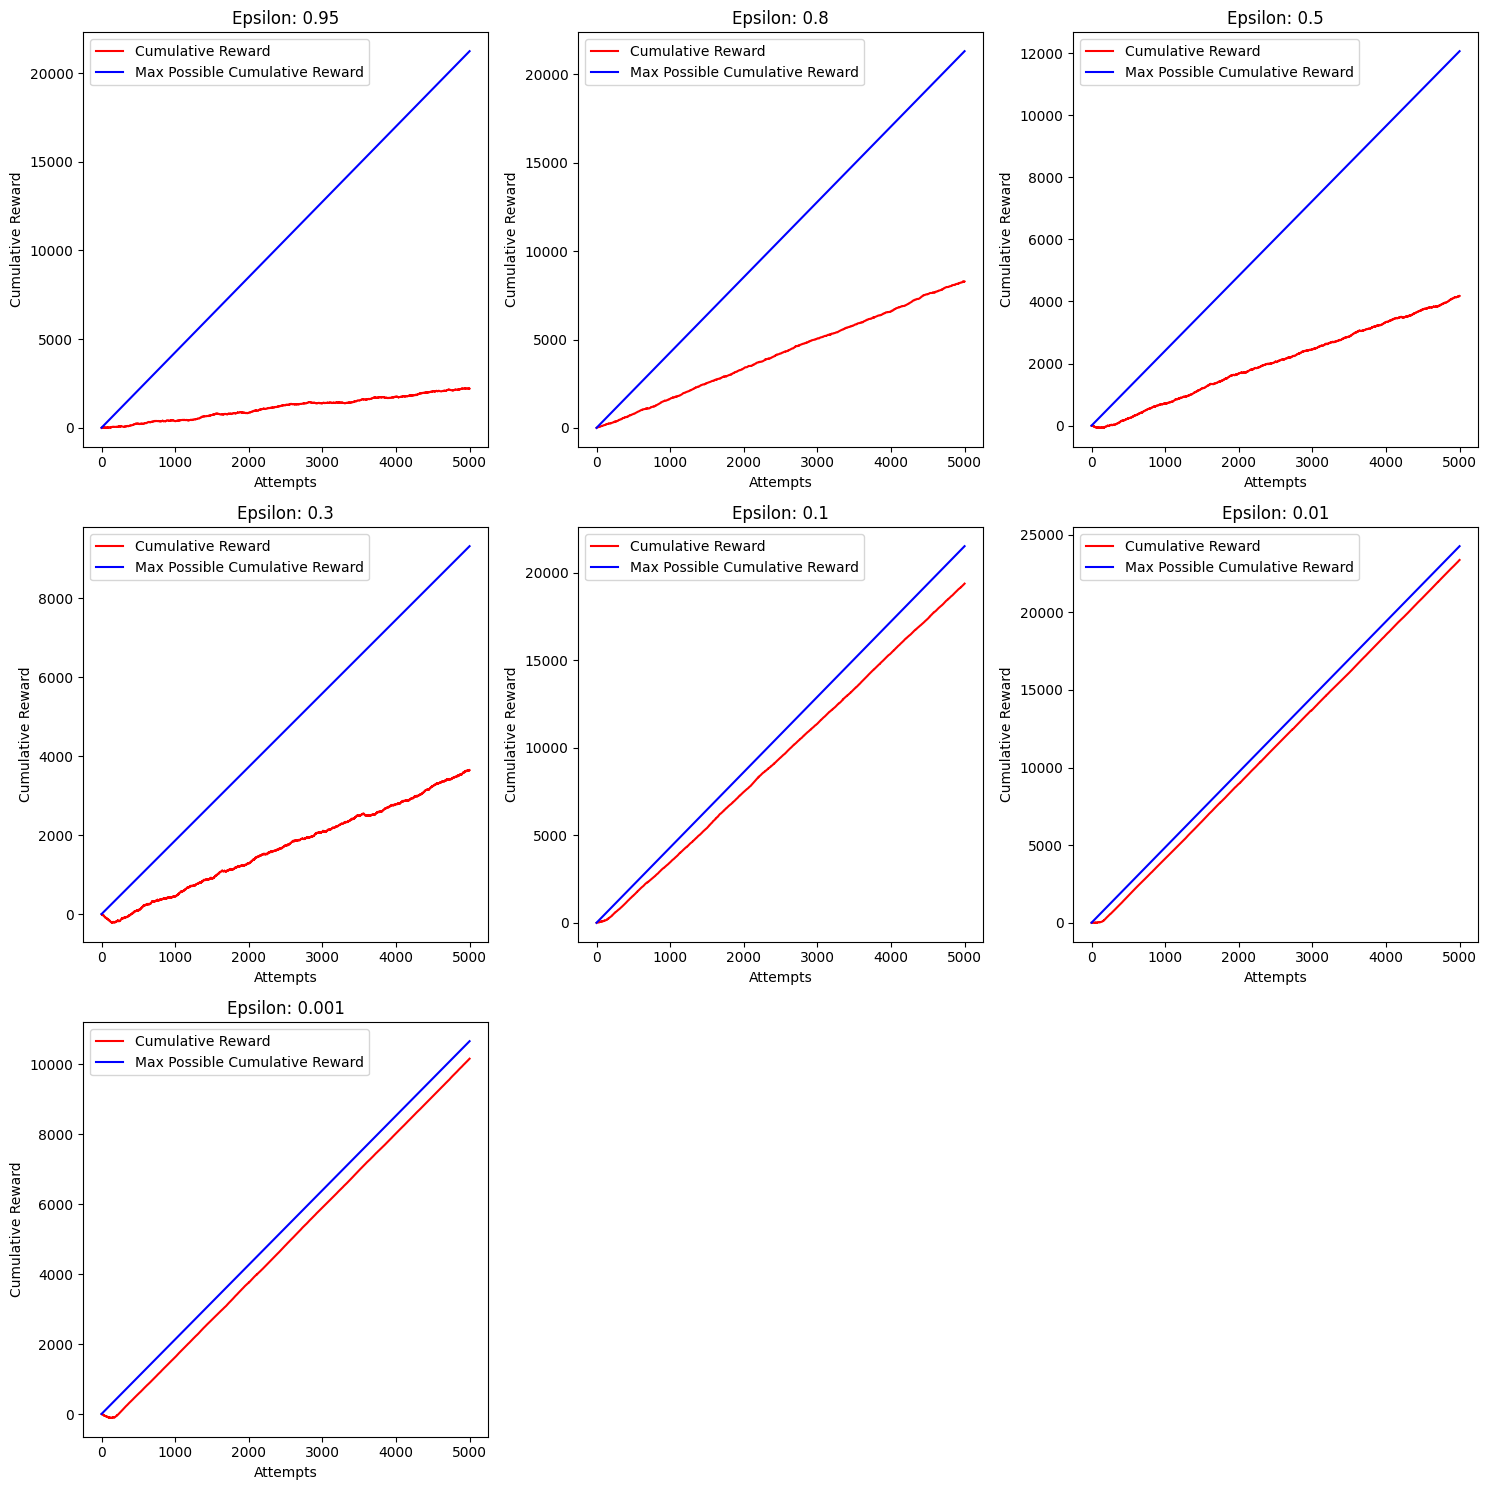

In [4]:
def prvi_zadatak() -> None:
    """
    Runs the training with different epsilon values and plots the results to analyze the performance.
    """
    epsilons = [0.95, 0.8, 0.5, 0.3, 0.1, 0.01, 0.001]
    rows = 3
    cols = 3
    plt.figure(figsize=(15, 15))

    for i, eps in enumerate(epsilons, start=1):
        plt.subplot(rows, cols, i)
        envi, rew, q1 = train(epsilon=eps, plotting=False)
        plot_e(envi.bandits, rew)
        plt.title(f"Epsilon: {eps}")

    plt.tight_layout()
    plt.show()

def plot_e(envi: BanditsEnvironment, rew: List[float]) -> None:
    """
    Plots the cumulative rewards for a given epsilon value.

    Args:
        envi (BanditsEnvironment): The bandits environment.
        rew (List[float]): List of rewards.
    """
    g = np.cumsum(rew)
    max_r = max([b.mean for b in envi])
    plt.plot(g, "r", label="Cumulative Reward")
    plt.plot(
        np.cumsum(max_r * np.ones(len(g))), "b", label="Max Possible Cumulative Reward"
    )
    plt.xlabel("Attempts")
    plt.ylabel("Cumulative Reward")
    plt.legend()

    
prvi_zadatak()

Zakljucak prvog zadatka jeste da bismo najbolje prosli (dobili najvecu kumulativnu nagradu) da smo koristili malo epsilon ali ne sasvim greedy politiku.
Prilikom smanjenja vrednosti epsilona, cesce je birana masina sa najvecom srednjom vrednosti (samim tim i veca nagarda) te je nagib krive kumulativne nagrade rastao.

### Zadatak 2:

Sa naucenim q i epsilon = 0, pustiti 100 iteracija

100%|██████████| 5000/5000 [00:00<00:00, 667542.65it/s]

Max Q naučena vrednost: 4.97
Prosečna nagrada - ε-Greedy Politika: 4.269892680129096
Prosečna nagrada - Čista Greedy Politika: 4.992209773258207


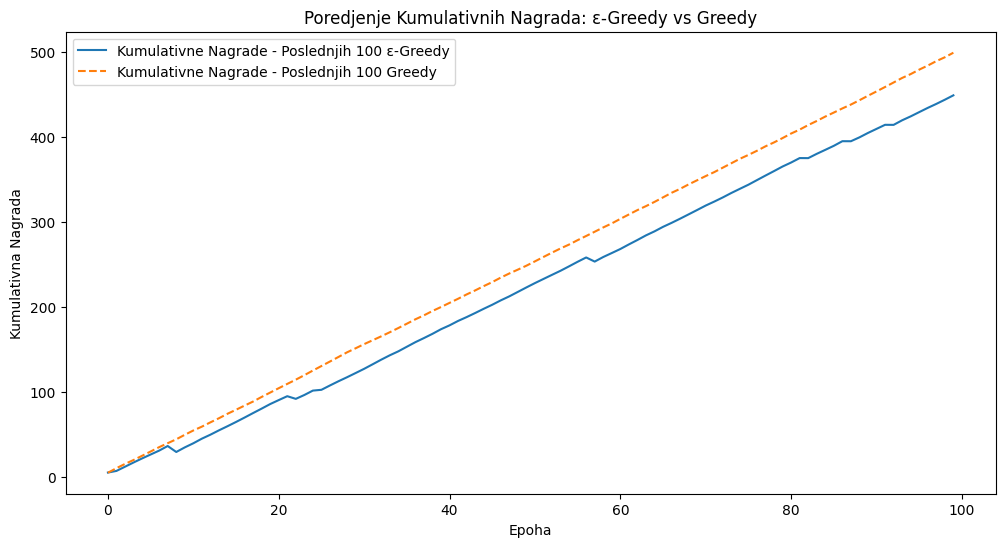

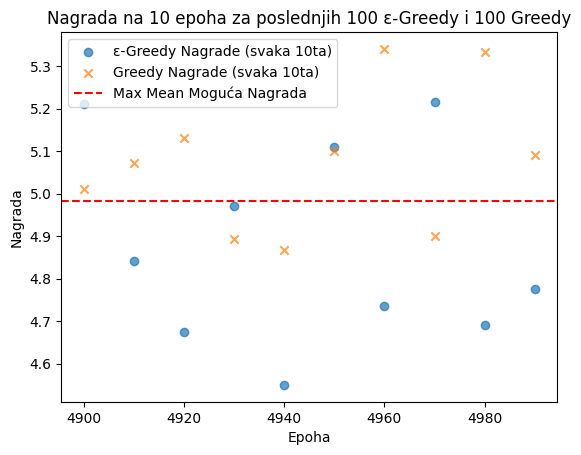

In [5]:
def drugi_zadatak(plotting: bool = False) -> None:
    """
    Evaluates the performance of the trained model with epsilon value of 0 (pure greedy approach).

    Args:
        plotting (bool): If True, plots the cumulative rewards and rewards comparison between epsilon-greedy and greedy policies.
    """
    env, rewards, q = train(plotting=False)
    learned_q = q.copy()

    # 100 iteracija sa epsilon = 0 (greedy metoda)
    greedy_rewards = []
    for _ in range(100):
        a = choose_greedy_action(learned_q)
        r = env.take_action(a)
        greedy_rewards.append(r)

    avg_rewards_eps_greedy = np.mean(rewards)
    avg_rewards_greedy = np.mean(greedy_rewards)
    print(f"Max Q naučena vrednost: {max(learned_q):.2f}")
    print("Prosečna nagrada - ε-Greedy Politika:", avg_rewards_eps_greedy)
    print("Prosečna nagrada - Čista Greedy Politika:", avg_rewards_greedy)
    if plotting:
        last_100_eps_greedy_rewards = rewards[-100:]

        cumulative_rewards_eps_greedy = np.cumsum(last_100_eps_greedy_rewards)
        cumulative_rewards_greedy = np.cumsum(greedy_rewards)

        plt.figure(figsize=(12, 6))
        plt.plot(
            cumulative_rewards_eps_greedy,
            label="Kumulativne Nagrade - Poslednjih 100 ε-Greedy",
        )
        plt.plot(
            cumulative_rewards_greedy,
            label="Kumulativne Nagrade - Poslednjih 100 Greedy",
            linestyle="--",
        )

        plt.xlabel("Epoha")
        plt.ylabel("Kumulativna Nagrada")
        plt.title("Poredjenje Kumulativnih Nagrada: ε-Greedy vs Greedy")
        plt.legend()
        plt.show()

        # Poredjenje na poslednjih 10 nagrada
        max_mean_reward = max(bandit.mean for bandit in env.bandits)
        eps_greedy_every_10 = last_100_eps_greedy_rewards[::10]
        greedy_every_10 = greedy_rewards[::10]

        epochs = range(len(rewards) - 100, len(rewards), 10)
        plt.scatter(
            epochs,
            eps_greedy_every_10,
            label="ε-Greedy Nagrade (svaka 10ta)",
            marker="o",
            alpha=0.7,
        )

        plt.scatter(
            epochs,
            greedy_every_10,
            label="Greedy Nagrade (svaka 10ta)",
            marker="x",
            alpha=0.7,
        )

        plt.axhline(
            y=max_mean_reward,
            color="r",
            linestyle="--",
            label="Max Mean Moguća Nagrada",
        )

        plt.xlabel("Epoha")
        plt.ylabel("Nagrada")
        plt.title("Nagrada na 10 epoha za poslednjih 100 ε-Greedy i 100 Greedy")
        plt.legend()
        plt.show()

drugi_zadatak(True)

### Zadatak 3:
a. Nakon 4000 iteracija promena srednje vrednosti i spanova bandita.

100%|██████████| 5000/5000 [00:00<00:00, 217953.86it/s]



Deviation after 4000 iterations:  0.18051604204207017


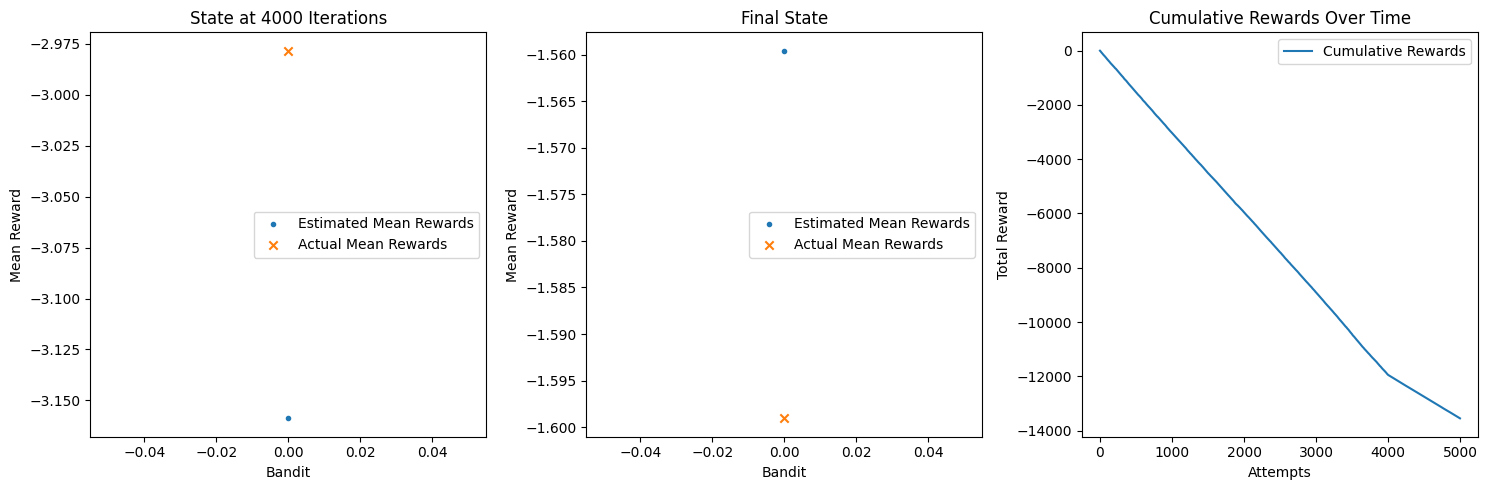


Final deviation:  0.039456973553329444


In [6]:
def treci_zadatak_a(
    bandits_no: int = 5,
    attempts_no: int = 5000,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    plotting: bool = True,
) -> None:
    """
    Tests the adaptability of the algorithm when the bandits' reward distributions change after a certain number of iterations.

    Args:
        bandits_no (int): Number of bandits.
        attempts_no (int): Total number of attempts (lever pulls).
        alpha (float): Learning rate.
        epsilon (float): Epsilon value for the epsilon-greedy strategy.
        plotting (bool): If True, plots the results before and after the change in bandits' distribution.
    """
    bandits = [
        Bandit(10 * (random.random() - 0.5), 5 * random.random())
        for _ in range(bandits_no)
    ]
    env = BanditsEnvironment(bandits)
    q = [100 for _ in range(bandits_no)]
    rewards = []

    if plotting:
        plt.figure(figsize=(15, 5))

    for t in trange(attempts_no):
        if t == 4000 and plotting:
            # Plot the state at 4000 iterations
            plt.subplot(1, 3, 1)
            plt.scatter(range(len(q)), q, marker=".", label="Estimated Mean Rewards")
            plt.scatter(
                range(len(q)),
                [b.mean for b in env.bandits],
                marker="x",
                label="Actual Mean Rewards",
            )
            plt.title("State at 4000 Iterations")
            plt.xlabel("Bandit")
            plt.ylabel("Mean Reward")
            plt.legend()

            print("\nDeviation after 4000 iterations: ", loss_function(q, env.bandits))

            # Create new bandits (m, s)
            bandits = [
                Bandit(10 * (random.random() - 0.5), 5 * random.random())
                for _ in range(bandits_no)
            ]
            env = BanditsEnvironment(bandits)

        a = choose_eps_greedy_action(q, epsilon)
        r = env.take_action(a)
        q[a] = q[a] + alpha * (r - q[a])
        rewards.append(r)

    if plotting:
        # Plot the final state
        plt.subplot(1, 3, 2)
        plt.scatter(range(len(q)), q, marker=".", label="Estimated Mean Rewards")
        plt.scatter(
            range(len(q)),
            [b.mean for b in env.bandits],
            marker="x",
            label="Actual Mean Rewards",
        )
        plt.title("Final State")
        plt.xlabel("Bandit")
        plt.ylabel("Mean Reward")
        plt.legend()

        # Plot cumulative rewards over time
        plt.subplot(1, 3, 3)
        g = np.cumsum(rewards)
        plt.plot(g, label="Cumulative Rewards")
        plt.title("Cumulative Rewards Over Time")
        plt.xlabel("Attempts")
        plt.ylabel("Total Reward")
        plt.legend()

        plt.tight_layout()
        plt.show()

        print("\nFinal deviation: ", loss_function(q, env.bandits))


def loss_function(q: List[float], envi: BanditsEnvironment) -> float:
    """
    Calculates the total deviation of the estimated mean values from the actual mean values of the bandits.

    Args:
        q (List[float]): Estimated mean values (Q-values).
        envi (BanditsEnvironment): The bandits environment.

    Returns:
        float: The total deviation.
    """
    loss = 0
    m = [b.mean for b in envi]
    for a in range(len(q)):
        loss += abs(q[a] - m[a])
    return loss


treci_zadatak_a(True)

b. U random iteracijama promeniti srednje vrednosti i spanove bandita

Run 3 with shifts 9.5, 9.5: 100%|██████████| 5000/5000 [00:00<00:00, 172855.49it/s]


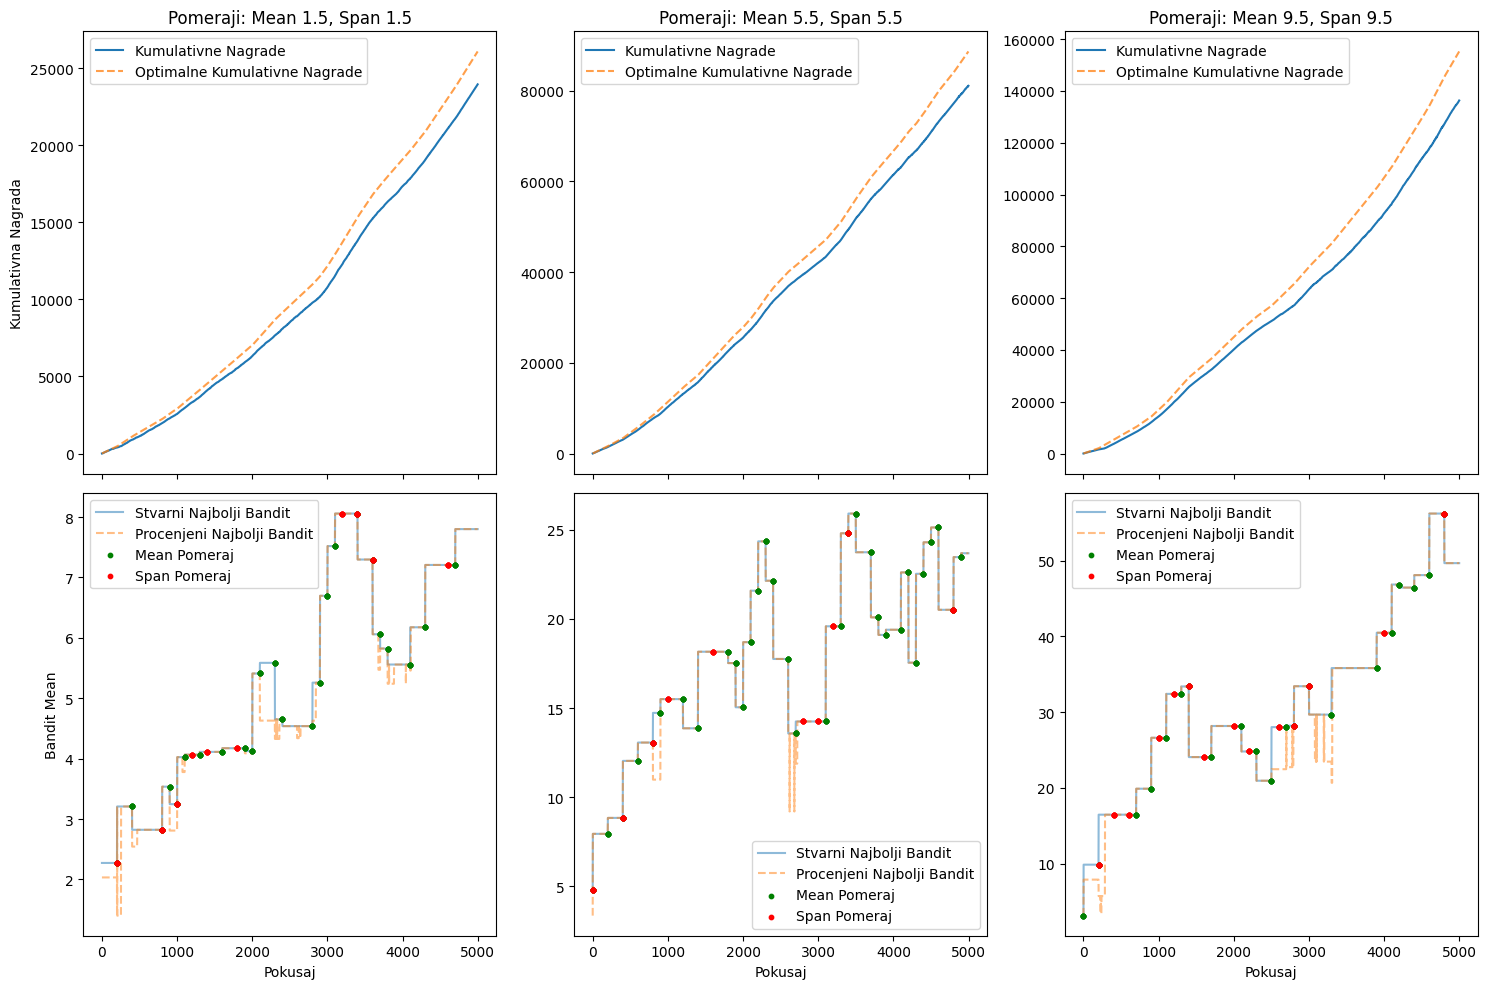

In [7]:
def time_change_train(
    bandits_no: int = 5,
    attempts_no: int = 5000,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    mean_shift_interval: int = 100,
    span_shift_interval: int = 200,
    shift_probability: float = 0.5,
    mean_shift_amount: float = 1.5,
    span_shift_amount: float = 1.5,
    shift_increment: int = 4,
    num_runs: int = 3,
    plotting: bool = False,
) -> None:
    """
    Trains the bandit environment with dynamic changes in the mean and span of bandits at specified intervals.
    It simulates an environment where bandit properties change over time, testing the algorithm's adaptability.

    Args:
        bandits_no (int): Number of bandits.
        attempts_no (int): Total number of attempts for each run.
        alpha (float): Learning rate.
        epsilon (float): Epsilon value for the epsilon-greedy strategy.
        mean_shift_interval (int): Number of attempts after which the mean value of a bandit may change.
        span_shift_interval (int): Number of attempts after which the span of a bandit may change.
        shift_probability (float): Probability of changing the mean or span at each interval.
        mean_shift_amount (float): Amount by which the mean value of a bandit can change.
        span_shift_amount (float): Amount by which the span of a bandit can change.
        shift_increment (int): Value to increment the shift amount after each run.
        num_runs (int): Number of times the entire simulation is run.
        plotting (bool): If True, plots the results of the training.

    This function performs multiple runs of the training, with the bandits' properties (mean and span)
    potentially changing at regular intervals, thereby challenging the algorithm to adapt to these changes.
    """
    fig, axes = plt.subplots(
        2, num_runs, figsize=(5 * num_runs, 10), sharex="col", squeeze=False
    )

    for run in range(num_runs):
        bandits = [
            Bandit(10 * (random.random() - 0.5), 5 * random.random())
            for _ in range(bandits_no)
        ]
        env = BanditsEnvironment(bandits)

        q = [0 for _ in range(bandits_no)]
        rewards = []
        optimal_means = []
        actual_best_bandit = []
        estimated_best_bandit = []
        mean_shifts = []
        span_shifts = []

        for t in trange(
            attempts_no,
            desc=f"Run {run + 1} with shifts {mean_shift_amount}, {span_shift_amount}",
        ):
            optimal_means.append(max(bandit.mean for bandit in env.bandits))
            actual_best_bandit.append(max(bandit.mean for bandit in env.bandits))
            estimated_best_bandit.append(env.bandits[np.argmax(q)].mean)

            if t % mean_shift_interval == 0 and shift_probability > random.random():
                for bandit in env.bandits:
                    mean_shift = mean_shift_amount * (random.random() - 0.5) * 2
                    bandit.mean += mean_shift
                    mean_shifts.append(t)

            if t % span_shift_interval == 0 and shift_probability > random.random():
                for bandit in env.bandits:
                    span_shift = span_shift_amount * (random.random() - 0.5) * 2
                    bandit.span += span_shift
                    span_shifts.append(t)

            a = choose_eps_greedy_action(q, epsilon)
            r = env.take_action(a)
            q[a] = q[a] + alpha * (r - q[a])

            rewards.append(r)

        # Prikaz kumulativnih nagrada u prvom redu
        cumsum_ax = axes[0, run]
        cumsum_ax.plot(np.cumsum(rewards), label="Kumulativne Nagrade")
        cumsum_ax.plot(
            np.cumsum(optimal_means),
            label="Optimalne Kumulativne Nagrade",
            linestyle="--",
            alpha=0.75,
        )
        cumsum_ax.set_title(
            f"Pomeraji: Mean {mean_shift_amount}, Span {span_shift_amount}"
        )
        cumsum_ax.legend()

        # Prikaz stvarnog naspram procenjenog najboljeg bandita u drugom redu
        best_bandit_ax = axes[1, run]
        best_bandit_ax.plot(
            actual_best_bandit,
            label="Stvarni Najbolji Bandit",
            linestyle="-",
            alpha=0.5,
        )
        best_bandit_ax.plot(
            estimated_best_bandit,
            label="Procenjeni Najbolji Bandit",
            linestyle="--",
            alpha=0.5,
        )

        best_bandit_ax.scatter(
            mean_shifts,
            [actual_best_bandit[i] for i in mean_shifts],
            color="green",
            zorder=5,
            label="Mean Pomeraj",
            s=10,
        )
        best_bandit_ax.scatter(
            span_shifts,
            [actual_best_bandit[i] for i in span_shifts],
            color="red",
            zorder=5,
            label="Span Pomeraj",
            s=10,
        )

        best_bandit_ax.set_xlabel("Pokusaj")

        best_bandit_ax.legend()

        if run == 0:
            cumsum_ax.set_ylabel("Kumulativna Nagrada")
            best_bandit_ax.set_ylabel("Bandit Mean")

        mean_shift_amount += shift_increment
        span_shift_amount += shift_increment

    plt.tight_layout()
    if plotting:
        plt.show()


def treci_zadatak_b(plotting: bool = False) -> None:
    """
    Executes the `time_change_train` function to test the adaptability of the algorithm to dynamically changing bandit environments.

    Args:
        plotting (bool): If True, enables the plotting of training results in `time_change_train`.

    This function calls `time_change_train` with the specified parameters, allowing for the observation of
    how well the algorithm adapts when the bandit properties change over time.
    """
    time_change_train(plotting=plotting)

treci_zadatak_b(True)

### Zadatak 4:
Uzeti 5 bandita i prikazati kako se njihove procenjene srednje vrednosti priblizavaju realnim tokom iteacija

100%|██████████| 5000/5000 [00:00<00:00, 500896.15it/s]


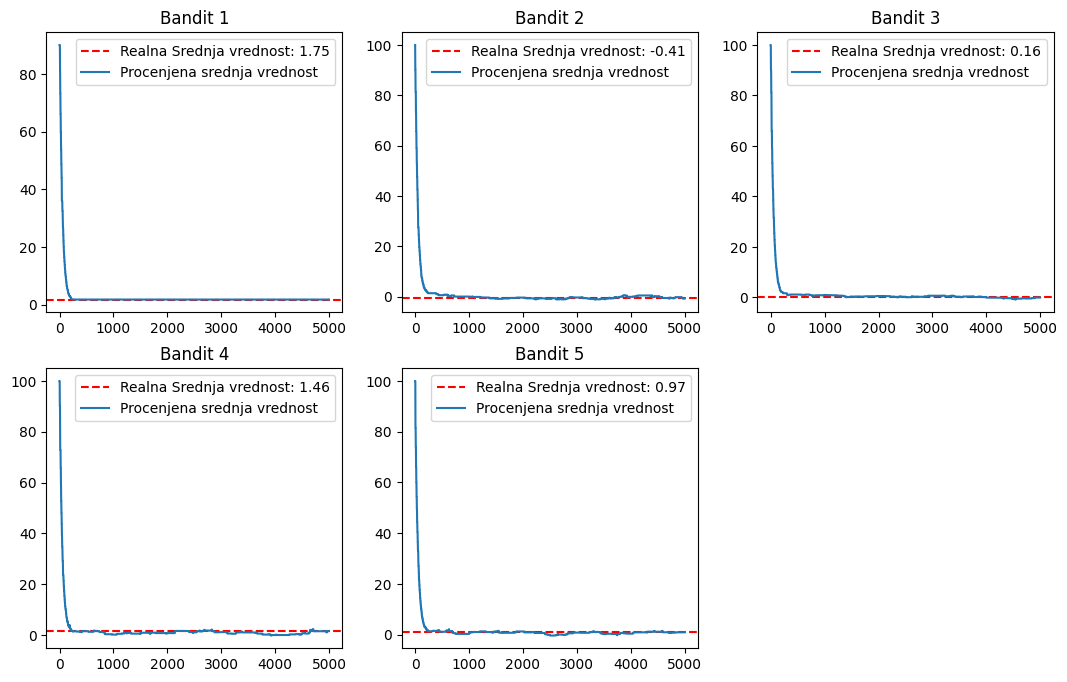

In [8]:
def cetvrti_zadatak(
    attempts_no: int = 5000, epsilon: float = 0.1, alpha: float = 0.1
) -> None:
    """
    Demonstrates the convergence of estimated mean rewards to the actual mean rewards of bandits over multiple attempts.

    This function creates an environment with a fixed number of bandits and simulates a series of lever pulls (attempts).
    It tracks the estimated rewards (Q-values) for each bandit and compares them against the bandits' actual mean rewards.

    Args:
        attempts_no (int): Total number of lever pulls during the training process.
        epsilon (float): Probability of selecting a random action (exploration factor).
        alpha (float): Learning rate, controlling the blend between new and old information.

    The function visualizes the convergence of the estimated mean rewards to the actual mean rewards for each bandit,
    demonstrating the learning process over time.
    """
    bandits = [
        Bandit(10 * (random.random() - 0.5), 5 * random.random()) for _ in range(5)
    ]
    env = BanditsEnvironment(bandits)

    q = [100 for _ in range(5)]
    rewards = []
    # Matrica 5 bandita x promene q za svaki
    q_value_history = np.zeros((attempts_no, 5))

    for t in trange(attempts_no):
        a = choose_eps_greedy_action(q, epsilon)
        r = env.take_action(a)
        q[a] = q[a] + alpha * (r - q[a])

        rewards.append(r)
        q_value_history[t] = q

    plot_mean(bandits, q_value_history)

    plt.show()


def plot_mean(bandits: List[Bandit], q_value_history: np.ndarray) -> None:
    """
    Plots the convergence of estimated mean rewards to actual mean rewards for each bandit.

    Args:
        bandits (List[Bandit]): A list of bandits in the environment.
        q_value_history (np.ndarray): A history of Q-values for each bandit across all attempts.

    This function generates a series of plots, one for each bandit, showing the actual mean reward and
    how the estimated mean reward converges to this value over time.
    """
    plt.figure(figsize=(13, 8))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.axhline(
            y=bandits[i].mean,
            color="r",
            linestyle="--",
            label=f"Realna Srednja vrednost: {bandits[i].mean:.2f}",
        )
        plt.plot(q_value_history[:, i], label=f"Procenjena srednja vrednost")
        plt.legend()
        plt.title(f"Bandit {i + 1}")

cetvrti_zadatak()

### Dodatni zadatak
Prikazati realne i procenjene vrednosti za sve bandite na jednom grafiku

100%|██████████| 5000/5000 [00:00<00:00, 418417.83it/s]


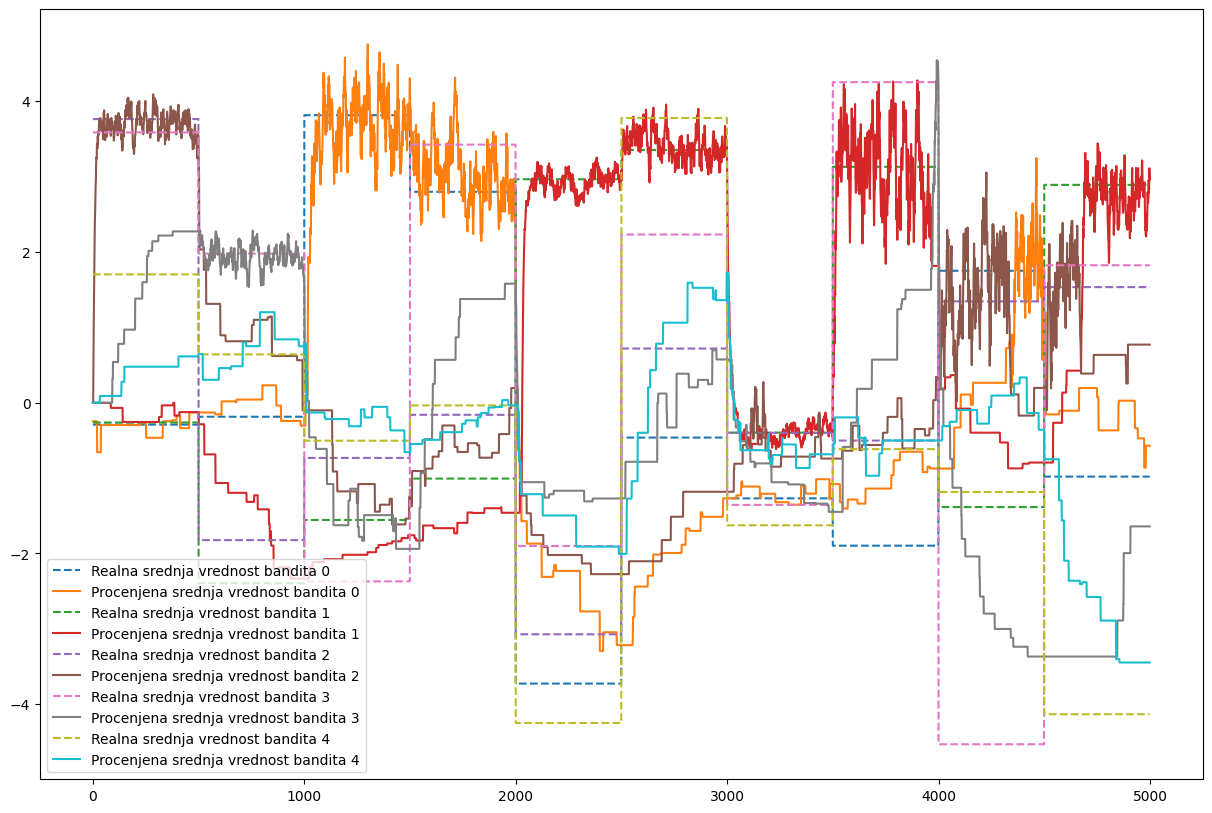

In [9]:
def dodatni_zadatak(
    bandits_no: int = 5,
    attempts_no: int = 5000,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    step: int = 500,
    plotting: bool = True,
) -> None:
    """
    Conducts an experiment where the bandits' mean values change periodically, and plots the convergence of
    estimated mean rewards to actual mean rewards for all bandits on a single graph.

    Args:
        bandits_no (int): Number of bandits in the environment.
        attempts_no (int): Total number of attempts during the training process.
        alpha (float): Learning rate, controlling the blend between new and old information.
        epsilon (float): Probability of selecting a random action (exploration factor).
        step (int): Interval at which the bandits' mean values are changed.
        plotting (bool): If True, plots the convergence graph.

    The function visualizes how the estimated mean rewards adjust as the bandits' real mean values change at regular intervals.
    It helps in understanding the algorithm's responsiveness and adaptability to changes in the environment.
    """
    bandits = [
        Bandit(10 * (random.random() - 0.5), 5 * random.random())
        for _ in range(bandits_no)
    ]
    env = BanditsEnvironment(bandits)
    q = [0 for _ in range(bandits_no)]

    q_value_history = np.zeros((attempts_no, len(bandits)))

    bandits_mean_history = np.zeros((attempts_no, len(bandits)))
    bandits_mean_history[0] = [bandit.mean for bandit in bandits]

    for t in trange(attempts_no):
        if t % step == 0:
            # Kreiranje novih bandita (m, s)
            bandits = [
                Bandit(10 * (random.random() - 0.5), 5 * random.random())
                for _ in range(bandits_no)
            ]
            env = BanditsEnvironment(bandits)
            bandits_mean_history[t] = [bandit.mean for bandit in bandits]

        a = choose_eps_greedy_action(q, epsilon)
        r = env.take_action(a)
        q[a] = q[a] + alpha * (r - q[a])

        if t != 0 and t % step != 0:
            bandits_mean_history[t] = bandits_mean_history[t - 1]

        q_value_history[t] = q

    plot_all_bandits_history(bandits, q_value_history, bandits_mean_history)


# Primeti se da sto je parametar step manji, algoritmu je teze tj. losije ce procenjivati realne vrednosti
# zato sto nema dovoljno iteracija za preciznu procenu.


def plot_all_bandits_history(
    bandits: List[Bandit], q_value_history: np.ndarray, bandits_hist: np.ndarray
) -> None:
    """
    Plots the historical real and estimated mean values for all bandits on a single graph.

    Args:
        bandits (List[Bandit]): A list of bandits in the environment.
        q_value_history (np.ndarray): A history of estimated mean values (Q-values) for each bandit across all attempts.
        bandits_hist (np.ndarray): A history of real mean values for each bandit across all attempts.

    This function creates a plot for each bandit, showing both the actual mean reward and the estimated mean reward over time.
    It is useful for visualizing the algorithm's ability to track the true mean rewards of the bandits as they change.
    """
    plt.figure(figsize=(15, 10))
    for i in range(len(bandits)):
        plt.plot(
            bandits_hist[:, i],
            label=f"Realna srednja vrednost bandita {i}",
            linestyle="--",
        )
        plt.plot(
            q_value_history[:, i], label=f"Procenjena srednja vrednost bandita {i}"
        )
        plt.legend()
    plt.show()

dodatni_zadatak()